# 导包与数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['KaiTi']# 解决汉字显示不出来的问题（设置为楷体）

In [3]:
df = pd.read_csv('boss.csv')
df

,Unnamed: 0,_id,adWord,appShow,approve,businessZones,city,companyFullName,companyId,companyLabelList,...,resumeProcessRate,salary,score,secondType,skillLables,stationname,subwayline,thirdType,workYear,job_detail
0,0,5de5e75734e608e63026c1bc,9,0,1,['亦庄'],北京,达疆网络科技（上海）有限公司,32836,"['年底双薪', '绩效奖金', '岗位晋升', '定期体检']",...,100,15k-30k,0,数据分析,"['BI', '数据分析']",万源街,亦庄线,BI,3-5年,"1 、负责o2o电商日常运营数据的统计, 监控, 梳理指标体系；||2、基于海量用户行为数据..."
1,1,5de5e75734e608e63026c1bd,0,0,1,NaN,北京,北京音娱时光科技有限公司,286568,"['年底双薪', '绩效奖金', '带薪年假', '免费健身']",...,100,10k-18k,0,数据分析,"['SQL', 'BI', 'SPSS']",知春路,10号线,数据分析,1-3年,职责描述：||1. 完善业务数据监控体系，进行新功能指标埋点逻辑设计，搭建分析框架，...
2,2,5de5e75734e608e63026c1be,0,0,1,['西北旺'],北京,北京千喜鹤餐饮管理有限公司,278964,[],...,0,20k-30k,0,数据分析,"['SQL', '数据分析']",永丰,16号线,数据分析,3-5年,工作职责：||1.负责根据业务目标，制定并执行产品或业务的运营数据监控与分析机制。||2.完...
3,3,5de5e75734e608e63026c1bf,0,0,0,NaN,北京,吉林省海生电子商务有限公司,399744,[],...,0,33k-50k,0,数据分析,['数据分析'],NaN,NaN,数据分析,3-5年,1.基于对业务的支持和理解，搭建出可以准确反映业务运作状况的数据指标体系；||2.商业嗅觉灵...
4,4,5de5e75734e608e63026c1c0,0,0,0,"['大望路', '建外大街', '南磨房']",北京,韦博网讯科技（北京）有限公司,580170,[],...,0,10k-15k,0,数据分析,['数据分析'],国贸,1号线,产品|需求|项目类,1-3年,职责描述：||1. 调研工作以客户需求为主导；||2. 根据市场调研计划，进行市场信息的收集...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,3135,5de5ea1134e608e63026cdfb,0,0,1,"['和平路', '荣业大街']",天津,清博津商（天津）教育科技有限公司,260578,[],...,0,1k-2k,0,审核,"['审核', '内容审核', '信息']",东南角,2号线,信息审核,应届毕业生,NaN
3136,3136,5de5ea1134e608e63026cdfc,0,0,1,NaN,天津,上海礼紫股权投资基金管理有限公司,264817,[],...,0,6k-8k,0,运营,['运营'],天津站,3号线,运营助理|专员,不限,NaN
3137,3137,5de5ea1134e608e63026cdfd,0,0,1,['中北'],天津,北京达佳互联信息技术有限公司,1880,"['股票期权', '弹性工作', '定期体检', '岗位晋升']",...,0,8k-15k,0,运营,"['运营', '用户运营']",NaN,NaN,用户运营,3-5年,NaN
3138,3138,5de5ea1134e608e63026cdfe,0,0,1,"['南营门', '南市', '海光寺']",天津,北京河狸家信息技术有限公司,25854,"['高配福利', '弹性时间', 'BAT￥', '逗逼伙伴']",...,1,6k-8k,0,运营,['商家运营'],西康路,3号线,商家运营,不限,NaN


仅取出对我们有用的数据列：[岗位名称，公司名称，城市，公司规模，学历要求，所属行业领域，薪资区间，技能标签，工作年限，岗位BG]

In [4]:
df = df[["positionName", "companyShortName", "city", "companySize", "education", 
           "industryField", "salary",'skillLables', "workYear",  "job_detail"]]

# 数据清洗

## 取数

仅取出对我们有用的数据行：数据分析 的 全职 岗位

In [5]:
cond1 = df['positionName'].str.contains('数据分析') # 包含数据分析
cond2 = ~(df['positionName'].str.contains('实习')) # 不包含实习
cond = cond1 & cond2 # 包含数据分析 且 不包含实习 
df = df[cond] # 选出包含数据分析 且 不包含实习 的行
df.drop('positionName',axis = 'columns',inplace = True)# 至此，把positionName列去掉即可
df

,companyShortName,city,companySize,education,industryField,salary,skillLables,workYear,job_detail
0,达达-京东到家,北京,2000人以上,本科,消费生活,15k-30k,"['BI', '数据分析']",3-5年,"1 、负责o2o电商日常运营数据的统计, 监控, 梳理指标体系；||2、基于海量用户行为数据..."
1,音娱时光,北京,50-150人,本科,移动互联网,10k-18k,"['SQL', 'BI', 'SPSS']",1-3年,职责描述：||1. 完善业务数据监控体系，进行新功能指标埋点逻辑设计，搭建分析框架，...
2,千喜鹤,北京,2000人以上,本科,消费生活,20k-30k,"['SQL', '数据分析']",3-5年,工作职责：||1.负责根据业务目标，制定并执行产品或业务的运营数据监控与分析机制。||2.完...
3,吉林省海生电子商务有限公司,北京,少于15人,本科,电商,33k-50k,['数据分析'],3-5年,1.基于对业务的支持和理解，搭建出可以准确反映业务运作状况的数据指标体系；||2.商业嗅觉灵...
4,WPIC,北京,50-150人,本科,"电商,软件开发",10k-15k,['数据分析'],1-3年,职责描述：||1. 调研工作以客户需求为主导；||2. 根据市场调研计划，进行市场信息的收集...
...,...,...,...,...,...,...,...,...,...
3040,苏州才客,苏州,15-50人,本科,"移动互联网,电商",20k-30k,"['数据分析', '数据运营']",3-5年,1. 至少三年数据分析经验；||2. 有电商行业/OTA/BAT工作经验的优先考虑；||...
3065,快手,天津,2000人以上,本科,文娱丨内容,8k-10k,"['数据分析', '数据运营', '可视化']",1-3年,岗位职责：||1、负责团队业务、人员指标建立及数据体系搭建，以衡量团队运营能力；|| 2...
3069,林之尚沃,天津,15-50人,本科,医疗丨健康,6k-10k,"['数据分析', '数据运营', 'BI', '数据库']",1-3年,【工作职责】：||1、负责数据报表模板建立，并进行常态数据统计、监控，推动数据平台的建立及完...
3071,格蒂电力,天津,500-2000人,大专,企业服务,6k-12k,"['数据分析', 'Oracle', 'ETL', '数据挖掘']",3-5年,工作职责||1. 负责数据接入、数据整合中的链路配置与调度配置工作。||职位要求||1....


## 将薪水转化为数值

将**str型的薪资区间**转化为**int型的薪资区间的平均值**

In [6]:
# 1. 将大小写的薪资单位都转换为小写
# 2. 利用正则表达式捕获组，提取出-前后的两个薪资数字形成两列DataFrame（仍是str）
# 3. 用applymap函数将str转化为int
# 4. 按行求平均
df['salary_mean'] = df['salary'].str.lower().str.extract(r'(\d+)k-(\d+)k').applymap(lambda x: int(x)).mean(axis = "columns")
df

,companyShortName,city,companySize,education,industryField,salary,skillLables,workYear,job_detail,salary_mean
0,达达-京东到家,北京,2000人以上,本科,消费生活,15k-30k,"['BI', '数据分析']",3-5年,"1 、负责o2o电商日常运营数据的统计, 监控, 梳理指标体系；||2、基于海量用户行为数据...",22.5
1,音娱时光,北京,50-150人,本科,移动互联网,10k-18k,"['SQL', 'BI', 'SPSS']",1-3年,职责描述：||1. 完善业务数据监控体系，进行新功能指标埋点逻辑设计，搭建分析框架，...,14.0
2,千喜鹤,北京,2000人以上,本科,消费生活,20k-30k,"['SQL', '数据分析']",3-5年,工作职责：||1.负责根据业务目标，制定并执行产品或业务的运营数据监控与分析机制。||2.完...,25.0
3,吉林省海生电子商务有限公司,北京,少于15人,本科,电商,33k-50k,['数据分析'],3-5年,1.基于对业务的支持和理解，搭建出可以准确反映业务运作状况的数据指标体系；||2.商业嗅觉灵...,41.5
4,WPIC,北京,50-150人,本科,"电商,软件开发",10k-15k,['数据分析'],1-3年,职责描述：||1. 调研工作以客户需求为主导；||2. 根据市场调研计划，进行市场信息的收集...,12.5
...,...,...,...,...,...,...,...,...,...,...
3040,苏州才客,苏州,15-50人,本科,"移动互联网,电商",20k-30k,"['数据分析', '数据运营']",3-5年,1. 至少三年数据分析经验；||2. 有电商行业/OTA/BAT工作经验的优先考虑；||...,25.0
3065,快手,天津,2000人以上,本科,文娱丨内容,8k-10k,"['数据分析', '数据运营', '可视化']",1-3年,岗位职责：||1、负责团队业务、人员指标建立及数据体系搭建，以衡量团队运营能力；|| 2...,9.0
3069,林之尚沃,天津,15-50人,本科,医疗丨健康,6k-10k,"['数据分析', '数据运营', 'BI', '数据库']",1-3年,【工作职责】：||1、负责数据报表模板建立，并进行常态数据统计、监控，推动数据平台的建立及完...,8.0
3071,格蒂电力,天津,500-2000人,大专,企业服务,6k-12k,"['数据分析', 'Oracle', 'ETL', '数据挖掘']",3-5年,工作职责||1. 负责数据接入、数据整合中的链路配置与调度配置工作。||职位要求||1....,9.0


## 根据“岗位详情”，修正“技能标签”列

通过与job_detail列的对比，发现skillLables列所包含的信息不够完全。所以从job_detail中提取相关技能，然后更新到skillLables中。

In [7]:
# 将skill_labels列其更新为只含有Python/R|SQL|Tableau|Excel/机器学习这四个技能的列

#将job_detail字符串小写化
df["job_detail"] = df["job_detail"].str.lower()

# 首先提取job_detail的每行的技能出来，放入相应的Series中
py = df['job_detail'].str.contains('python|r').map(lambda x: 'Python/R' if x == True else np.NaN)
sql = df['job_detail'].str.contains('sql').map(lambda x: 'SQL' if x == True else np.NaN)
tau = df['job_detail'].str.contains('tableau').map(lambda x: 'Tableau' if x == True else np.NaN)
exl = df['job_detail'].str.contains('excel').map(lambda x: 'Excel' if x == True else np.NaN)
ml = df['job_detail'].str.contains('机器学习').map(lambda x: '机器学习' if x == True else np.NaN)

# 将这几个series中的str左右连接起来：在前后加上中括号，用""将每个技能括起来，缺失值用空白符代替
new_skill = '['+('\''+ py + '\'').str.cat(('\''+ sql + '\''),na_rep = '').str.cat(('\''+ tau + '\''),na_rep = '').str.cat(('\''+ exl + '\''),na_rep = '').str.cat(('\''+ ml + '\''),na_rep = '')+']'

#修正skillLables
df['skillLables'] = new_skill
df

,companyShortName,city,companySize,education,industryField,salary,skillLables,workYear,job_detail,salary_mean
0,达达-京东到家,北京,2000人以上,本科,消费生活,15k-30k,['Python/R''SQL''Excel'],3-5年,"1 、负责o2o电商日常运营数据的统计, 监控, 梳理指标体系；||2、基于海量用户行为数据...",22.5
1,音娱时光,北京,50-150人,本科,移动互联网,10k-18k,['Python/R''SQL''Excel'],1-3年,职责描述：||1. 完善业务数据监控体系，进行新功能指标埋点逻辑设计，搭建分析框架，...,14.0
2,千喜鹤,北京,2000人以上,本科,消费生活,20k-30k,['Python/R''SQL'],3-5年,工作职责：||1.负责根据业务目标，制定并执行产品或业务的运营数据监控与分析机制。||2.完...,25.0
3,吉林省海生电子商务有限公司,北京,少于15人,本科,电商,33k-50k,['Python/R''SQL'],3-5年,1.基于对业务的支持和理解，搭建出可以准确反映业务运作状况的数据指标体系；||2.商业嗅觉灵...,41.5
4,WPIC,北京,50-150人,本科,"电商,软件开发",10k-15k,['Python/R'],1-3年,职责描述：||1. 调研工作以客户需求为主导；||2. 根据市场调研计划，进行市场信息的收集...,12.5
...,...,...,...,...,...,...,...,...,...,...
3040,苏州才客,苏州,15-50人,本科,"移动互联网,电商",20k-30k,['Python/R''SQL''Excel'],3-5年,1. 至少三年数据分析经验；||2. 有电商行业/ota/bat工作经验的优先考虑；||...,25.0
3065,快手,天津,2000人以上,本科,文娱丨内容,8k-10k,['Excel'],1-3年,岗位职责：||1、负责团队业务、人员指标建立及数据体系搭建，以衡量团队运营能力；|| 2...,9.0
3069,林之尚沃,天津,15-50人,本科,医疗丨健康,6k-10k,['Excel'],1-3年,【工作职责】：||1、负责数据报表模板建立，并进行常态数据统计、监控，推动数据平台的建立及完...,8.0
3071,格蒂电力,天津,500-2000人,大专,企业服务,6k-12k,['Python/R''SQL'],3-5年,工作职责||1. 负责数据接入、数据整合中的链路配置与调度配置工作。||职位要求||1....,9.0


## 处理冗杂的“行业领域”列

我们看到industryField列中所包含的行业领域太多，存在一个公司同属于多个行业领域的情况。比如说“苏州才客”既属于移动互联网领域，又属于电商领域。这不利于我们后面的分析。于是考虑精简行业领域为只有一个领域。

In [8]:
df["industryField"].unique()

array(['消费生活', '移动互联网', '电商', '电商,软件开发', '教育', '移动互联网,金融', '房产家居', '金融',
       '硬件', '其他', '游戏', '数据服务', '移动互联网,电商', '文娱丨内容', '移动互联网,社交', '企业服务',
       '移动互联网,消费生活', '数据服务,硬件', '移动互联网,文娱丨内容', '旅游', '汽车丨出行', '电商,消费生活',
       '社交', '移动互联网,数据服务', '移动互联网,游戏', '医疗丨健康,数据服务', '人工智能', '数据服务,人工智能',
       '移动互联网,企业服务', '移动互联网,医疗丨健康', '金融,企业服务', '电商,金融', '移动互联网,教育', '工具',
       '移动互联网,广告营销', '消费生活,电商', '移动互联网,旅游', '广告营销', '企业服务,移动互联网',
       '企业服务,数据服务', '消费生活,汽车丨出行', '金融,医疗丨健康', '金融,数据服务', '医疗丨健康',
       '信息安全,数据服务', '数据服务,移动互联网', '社交,金融', '电商,硬件', '企业服务,软件开发',
       '企业服务,电商', '教育,移动互联网', '金融,移动互联网', '移动互联网,信息安全', '文娱丨内容,硬件',
       '广告营销,移动互联网', '物流丨运输,软件开发', '企业服务,金融', '汽车丨出行,数据服务', '移动互联网,人工智能',
       '金融,软件开发', '文娱丨内容,社交', '文娱丨内容,移动互联网', '金融,游戏', '物流丨运输', '移动互联网,硬件',
       '电商,移动互联网', '数据服务,企业服务', '电商,数据服务', '其他,企业服务', '广告营销,数据服务', '信息安全',
       '电商,其他', '人工智能,其他', '数据服务,文娱丨内容', '消费生活,广告营销', '消费生活,金融',
       '电商,广告营销', '教育,社交', '社交,文娱丨内容', '企业服务,硬件', '电商,企业服务', '金融,文娱丨内容',
     

In [9]:
# 定义函数：对于多行业我们只取第一个行业。特别地，因为“移动互联网”太宽泛，所以第一个是移动互联网的我们取第二个。
def simplify_industry(x):
    x = x.split(",")
    if x[0]=="移动互联网" and len(x)>1:
        return x[1]
    else:
        return x[0]

df["industryField"] = df.industryField.map(simplify_industry)# 将函数应用到Series的每个元素上
df["industryField"].unique()# 这样得到的industryField就精简了许多

array(['消费生活', '移动互联网', '电商', '教育', '金融', '房产家居', '硬件', '其他', '游戏',
       '数据服务', '文娱丨内容', '社交', '企业服务', '旅游', '汽车丨出行', '医疗丨健康', '人工智能',
       '工具', '广告营销', '信息安全', '物流丨运输', '通讯电子', '软件开发', '数据服务 移动互联网',
       '区块链 人工智能', '电子商务', '数据服务、金融'], dtype=object)

# 数据分析

In [10]:
df

,companyShortName,city,companySize,education,industryField,salary,skillLables,workYear,job_detail,salary_mean
0,达达-京东到家,北京,2000人以上,本科,消费生活,15k-30k,['Python/R''SQL''Excel'],3-5年,"1 、负责o2o电商日常运营数据的统计, 监控, 梳理指标体系；||2、基于海量用户行为数据...",22.5
1,音娱时光,北京,50-150人,本科,移动互联网,10k-18k,['Python/R''SQL''Excel'],1-3年,职责描述：||1. 完善业务数据监控体系，进行新功能指标埋点逻辑设计，搭建分析框架，...,14.0
2,千喜鹤,北京,2000人以上,本科,消费生活,20k-30k,['Python/R''SQL'],3-5年,工作职责：||1.负责根据业务目标，制定并执行产品或业务的运营数据监控与分析机制。||2.完...,25.0
3,吉林省海生电子商务有限公司,北京,少于15人,本科,电商,33k-50k,['Python/R''SQL'],3-5年,1.基于对业务的支持和理解，搭建出可以准确反映业务运作状况的数据指标体系；||2.商业嗅觉灵...,41.5
4,WPIC,北京,50-150人,本科,电商,10k-15k,['Python/R'],1-3年,职责描述：||1. 调研工作以客户需求为主导；||2. 根据市场调研计划，进行市场信息的收集...,12.5
...,...,...,...,...,...,...,...,...,...,...
3040,苏州才客,苏州,15-50人,本科,电商,20k-30k,['Python/R''SQL''Excel'],3-5年,1. 至少三年数据分析经验；||2. 有电商行业/ota/bat工作经验的优先考虑；||...,25.0
3065,快手,天津,2000人以上,本科,文娱丨内容,8k-10k,['Excel'],1-3年,岗位职责：||1、负责团队业务、人员指标建立及数据体系搭建，以衡量团队运营能力；|| 2...,9.0
3069,林之尚沃,天津,15-50人,本科,医疗丨健康,6k-10k,['Excel'],1-3年,【工作职责】：||1、负责数据报表模板建立，并进行常态数据统计、监控，推动数据平台的建立及完...,8.0
3071,格蒂电力,天津,500-2000人,大专,企业服务,6k-12k,['Python/R''SQL'],3-5年,工作职责||1. 负责数据接入、数据整合中的链路配置与调度配置工作。||职位要求||1....,9.0


## 关于岗位需求量

分析不同**城市**的岗位需求量

In [11]:
ordered_city = df['city'].value_counts().index
ordered_city

Index(['北京', '上海', '深圳', '广州', '杭州', '成都', '武汉', '南京', '苏州', '厦门', '长沙', '西安',
       '天津'],
      dtype='object')

分析**前十行业领域**的岗位需求量

In [12]:
print(df['industryField'].value_counts().index) # 有点多，只取前十个吧
ordered_industryField = df['industryField'].value_counts()[0:10].index
ordered_industryField

Index(['金融', '电商', '数据服务', '移动互联网', '消费生活', '企业服务', '文娱丨内容', '游戏', '社交', '教育',
       '硬件', '旅游', '医疗丨健康', '汽车丨出行', '信息安全', '广告营销', '其他', '工具', '物流丨运输',
       '房产家居', '人工智能', '电子商务', '软件开发', '数据服务 移动互联网', '通讯电子', '区块链 人工智能',
       '数据服务、金融'],
      dtype='object')


Index(['金融', '电商', '数据服务', '移动互联网', '消费生活', '企业服务', '文娱丨内容', '游戏', '社交', '教育'], dtype='object')

将两结果可视化

Text(0, 0.5, '行业领域')

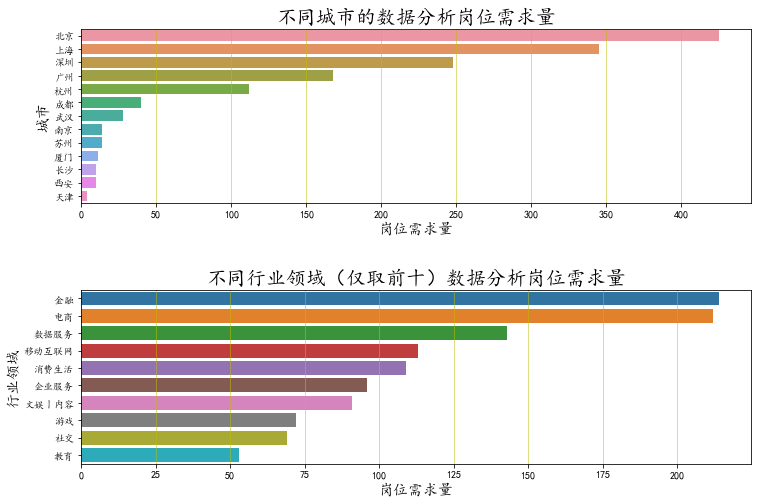

In [13]:
fig,axes = plt.subplots(nrows = 2,ncols = 1,figsize = (12,8))
plt.subplots_adjust(hspace = 0.5)# 调整上下两个子图的间距


#  不同城市数据分析岗位需求量分析
sns.countplot(ax = axes[0],y = 'city',order = ordered_city,data = df)# x轴为不同城市，y值为数量。(按照数量多少排序)

axes[0].xaxis.grid(which='both', linewidth=0.5, color='y')
axes[0].set_title('不同城市的数据分析岗位需求量',fontsize=20,weight='bold')
axes[0].set_xlabel('岗位需求量',fontsize=15)
axes[0].set_ylabel('城市',fontsize=15)


# 不同行业领域（仅取前十）数据分析岗位需求量分析
sns.countplot(ax = axes[1],y = 'industryField', data = df, order = ordered_industryField)

axes[1].xaxis.grid(which='both', linewidth=0.5, color='y')
axes[1].set_title('不同行业领域（仅取前十）数据分析岗位需求量',fontsize=20,weight='bold')
axes[1].set_xlabel('岗位需求量',fontsize=15)
axes[1].set_ylabel('行业领域',fontsize=15)

**结论**：

- 四个超一线城市北京、上海、广州、深圳的岗位需求量远超其他城市。杭州也是一个岗位需求量比较多的城市。所观察的城市里面，天津的岗位需求量最少
- 金融，电商领域的数据分析岗位需求量远超其他领域。教育行业数据分析岗位需求量最少。

## 关于薪资

### 不同学历的薪资分析

In [14]:
# 按平均薪资对四种学历排序
ordered_education_by_salary = df.groupby('education')['salary_mean'].mean().sort_values(ascending = False).index
ordered_education_by_salary

Index(['本科', '硕士', '不限', '大专'], dtype='object', name='education')

<ipython-input-15-4eb2d9dde54d>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels([' ',' ','10k','20k','30k','40k','50k','60k'])


[Text(0, -10.0, ' '),
 Text(0, 0.0, ' '),
 Text(0, 10.0, '10k'),
 Text(0, 20.0, '20k'),
 Text(0, 30.0, '30k'),
 Text(0, 40.0, '40k'),
 Text(0, 50.0, '50k'),
 Text(0, 60.0, '60k'),
 Text(0, 70.0, '')]

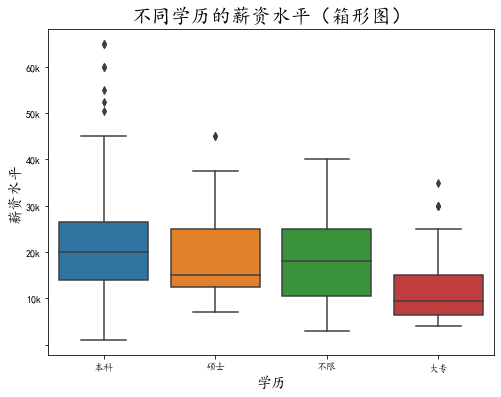

In [15]:
fig,axes = plt.subplots(figsize = (8,6))

# 画出不同学历的薪资水平箱线图
sns.boxplot(x = 'education',y = 'salary_mean',data = df,order = ordered_education_by_salary)


axes.set_title('不同学历的薪资水平（箱形图）',fontsize=20,weight='bold')
axes.set_xlabel('学历',fontsize=15)
axes.set_ylabel('薪资水平',fontsize=15)
axes.set_yticklabels([' ',' ','10k','20k','30k','40k','50k','60k'])

**结论：**

- 本硕在数据分析岗位上的薪资差异不显著
- 大专学历的薪资明显低一些

### 不同城市的薪资分析

In [16]:
# 按平均薪资对城市排序
ordered_city_by_salary = df.groupby('city')['salary_mean'].mean().sort_values(ascending = False).index
ordered_city_by_salary

Index(['北京', '上海', '杭州', '深圳', '苏州', '南京', '广州', '武汉', '厦门', '成都', '长沙', '天津',
       '西安'],
      dtype='object', name='city')

<ipython-input-17-b8d41bac170b>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels([" ","5k","10k","15k","20k"])
<ipython-input-17-b8d41bac170b>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_yticklabels([" ","0k","10k","20k","30k","40k","50k","60k"])


[Text(0, -10.0, ' '),
 Text(0, 0.0, '0k'),
 Text(0, 10.0, '10k'),
 Text(0, 20.0, '20k'),
 Text(0, 30.0, '30k'),
 Text(0, 40.0, '40k'),
 Text(0, 50.0, '50k'),
 Text(0, 60.0, '60k'),
 Text(0, 70.0, '')]

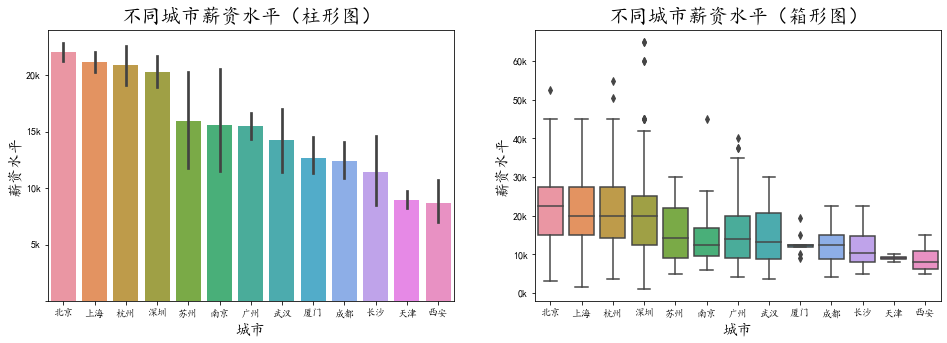

In [17]:
fig,axes = plt.subplots(nrows = 1,ncols = 2,figsize = (16,5))
sns.barplot(ax = axes[0],x = 'city',y = 'salary_mean',data = df,order = ordered_city_by_salary)# 柱形图
sns.boxplot(ax = axes[1],x = 'city',y = 'salary_mean',data = df,order = ordered_city_by_salary)# 箱形图


axes[0].set_title('不同城市薪资水平（柱形图）',fontsize=20,weight='bold')
axes[0].set_xlabel('城市',fontsize=15)
axes[0].set_ylabel('薪资水平',fontsize=15)
axes[0].set_yticklabels([" ","5k","10k","15k","20k"])

axes[1].set_title('不同城市薪资水平（箱形图）',fontsize=20,weight='bold')
axes[1].set_xlabel('城市',fontsize=15)
axes[1].set_ylabel('薪资水平',fontsize=15)
axes[1].set_yticklabels([" ","0k","10k","20k","30k","40k","50k","60k"])

**结论：**

- 四个超一线城市中，除了广州，其他三个城市的薪资水平表现稳定、仍居榜首。值得注意的是，杭州的平均薪资位列第三。
- 和“岗位需求量”的分析结果类似，西安、天津、长沙这三个城市薪资水平仍居末尾，说明这三个城市数据分析行业发展不够兴旺。
- 杭州，深圳这两个城市的薪资离群点较多，说明数据分析岗位在这两个城市发展空间大，机遇多。

### 不同行业领域的薪资分析

In [18]:
# 取出平均薪资前十的行业领域
ordered_industryField_by_salary = df.groupby('industryField')['salary_mean'].mean().sort_values(ascending = False)[0:10]
ordered_industryField_by_salary

industryField
硬件          28.597826
工具          28.433333
人工智能        26.045455
社交          24.500000
房产家居        23.884615
电子商务        23.333333
文娱丨内容       22.153846
区块链 人工智能    22.000000
教育          21.707547
旅游          21.675676
Name: salary_mean, dtype: float64

<ipython-input-19-31b12429a664>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([" ","5k","10k","15k","20k","25k","30k"])


[Text(0.0, 0, ' '),
 Text(5.0, 0, '5k'),
 Text(10.0, 0, '10k'),
 Text(15.0, 0, '15k'),
 Text(20.0, 0, '20k'),
 Text(25.0, 0, '25k'),
 Text(30.0, 0, '30k'),
 Text(35.0, 0, '')]

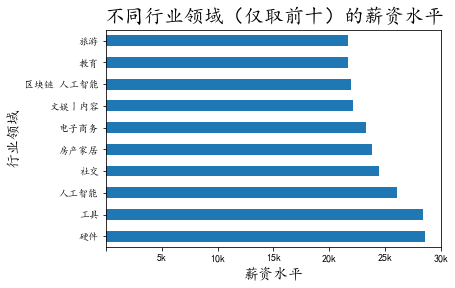

In [19]:
fig,ax = plt.subplots(figsize=(6,4))
ordered_industryField_by_salary.plot.barh()

ax.set_title('不同行业领域（仅取前十）的薪资水平',fontsize=20,weight='bold')
ax.set_xlabel('薪资水平',fontsize=15)
ax.set_ylabel('行业领域',fontsize=15)
ax.set_xticklabels([" ","5k","10k","15k","20k","25k","30k"])

**结论：**

- 可以看出“硬件”，“工具”行业的薪资水平最高，平均薪资都在28k左右

#### 不同行业领域不同工作经验要求下的薪资分析

In [20]:
industryField_with_workYear=df.pivot_table(index = 'industryField',columns = 'workYear',values = 'salary_mean').drop('不限',axis = 'columns')
columns = ['应届毕业生','1年以下','1-3年','3-5年','5-10年','10年以上']
industryField_with_workYear = industryField_with_workYear[columns]# 更改列顺序

<AxesSubplot:xlabel='workYear', ylabel='industryField'>

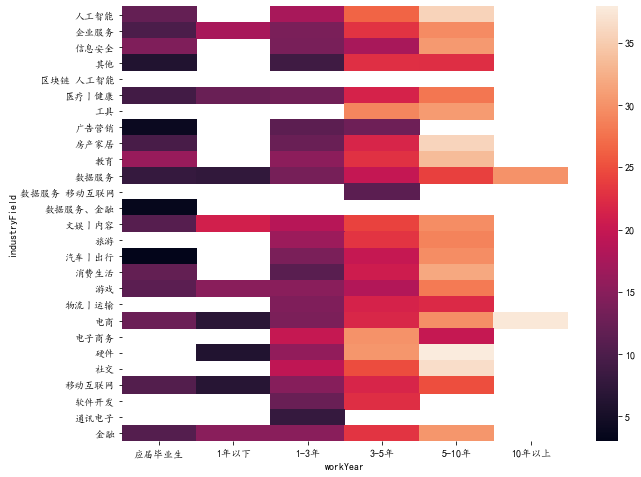

In [21]:
# 画热力图
fig,ax = plt.subplots(figsize=(10,8))
sns.heatmap(industryField_with_workYear)

**结论：**

- 根据热力图，我们可以肉眼看出岗位要求的工作经验越高，开出的薪资就越高。应届毕业生在各个行业都是最廉价的劳动力，而要求10年以上工作经验的岗位开出的工资都在30k+的水平。
- 高昂的薪资也导致了很少有行业要求10年以上的工作经验，只有电商和数据服务要求10年以上工作经验。这说明"电商"与"数据服务"行业的数据分析工作是经验导向型的工作。

反思：选取数据量不够充足！热力图中的空白区域是由数据量不够充足导致的。

### 不同公司的薪资分析

In [22]:
print(df['companyShortName'].nunique())
print(df.shape[0])
# 两者不相等，说明至少有公司出现两次，可以进行不同公司的薪资分析。
# 当然了，每个公司的数据量只有两行左右，数据量太少得到的结果一定是及其不准确的，这里只是用来练练手。

796
1429


In [23]:
# 按照薪资水平给公司排序
ordered_company = df.groupby('companyShortName')['salary_mean'].mean().sort_values()
ordered_company

companyShortName
宜家                1.5
客锐市场信息            3.0
数字智通              3.5
所罗门               3.5
蚂蚁物流              4.0
                 ... 
吉林省海生电子商务有限公司    41.5
马蜂窝              45.0
同花顺              50.0
佳音咨询             50.5
货拉拉              60.0
Name: salary_mean, Length: 796, dtype: float64

In [24]:
# 取前十公司
top_10 = ordered_company.sort_values(ascending = False)[0:10].sort_values()
# 取后十公司
last_10 = ordered_company[0:10]

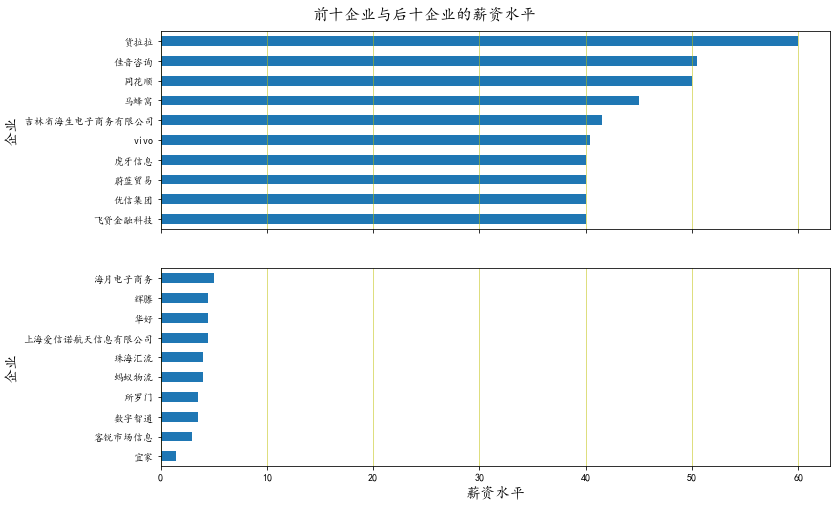

In [25]:
fig,axes = plt.subplots(nrows = 2,ncols = 1,figsize = (12,8),sharex = True)# 共用X轴
top_10.plot.barh(ax = axes[0])
last_10.plot.barh(ax = axes[1])

fig.text(x=0.3, y=0.90,s='前十企业与后十企业的薪资水平', fontsize=16)
axes[1].set_xlabel('薪资水平',fontsize=15)
axes[1].set_ylabel('企业',fontsize=15)
axes[0].set_ylabel('企业',fontsize=15)
axes[1].xaxis.grid(which='both', linewidth=0.5, color='y')
axes[0].xaxis.grid(which='both', linewidth=0.5, color='y')

**结论：**

- 货拉拉是所有企业中薪资水平最高的，宜家是所有企业中薪资水平最低的
- 高薪公司与低薪公司的工资差异达50k之多

注：由于每个企业的数据行太少，该结论不具有参考价值！

## 关于技能要求

### 不同的公司规模对技能的要求比例分析

In [26]:
# 先数据预处理一下,为表添加表示各个技能的列
df["Python/R"] = df['job_detail'].str.contains('python|r').map(lambda x: 1 if x == True else 0)
df["SQL"] = df['job_detail'].str.contains('sql').map(lambda x: 1 if x == True else 0)
df["Tableau"] = df['job_detail'].str.contains('tableau').map(lambda x: 1 if x == True else 0)
df["Excel"] = df['job_detail'].str.contains('excel').map(lambda x: 1 if x == True else 0)
df["机器学习"] = df['job_detail'].str.contains('机器学习').map(lambda x: 1 if x == True else 0)

#以companySize重建索引并获取Python/R	SQL	Tableau	Excel	机器学习列
df_skills = df.set_index('companySize')[['Python/R','SQL','Tableau','Excel','机器学习']].loc[["少于15人","15-50人","50-150人","150-500人","500-2000人", "2000人以上"],:]
df_skills

,Python/R,SQL,Tableau,Excel,机器学习
companySize,,,,,
少于15人,1,1,0,0,0
少于15人,1,0,0,0,1
少于15人,1,0,0,0,1
少于15人,1,1,1,1,1
少于15人,0,0,0,1,0
...,...,...,...,...,...
2000人以上,1,1,0,0,1
2000人以上,1,1,1,0,0
2000人以上,1,1,0,1,0


In [27]:
#求出不同规模企业对不同技能的要求比例
Python_R = (df_skills.groupby('companySize')['Python/R'].sum()).div(df_skills.groupby('companySize')['Python/R'].count())
SQL = (df_skills.groupby('companySize')['SQL'].sum()).div(df_skills.groupby('companySize')['SQL'].count())
Tableau = (df_skills.groupby('companySize')['Tableau'].sum()).div(df_skills.groupby('companySize')['Tableau'].count())
Excel = (df_skills.groupby('companySize')['Excel'].sum()).div(df_skills.groupby('companySize')['Excel'].count())
machl = (df_skills.groupby('companySize')['机器学习'].sum()).div(df_skills.groupby('companySize')['机器学习'].count())

df_skills_pro = pd.concat([Python_R,SQL,Tableau,Excel,machl],axis = 'columns').loc[["少于15人","15-50人","50-150人","150-500人","500-2000人", "2000人以上"],:]
df_skills_pro# 含义:10-15人的公司中有65%的公司要求Python/R技能

,Python/R,SQL,Tableau,Excel,机器学习
companySize,,,,,
少于15人,0.772727,0.590909,0.136364,0.454545,0.272727
15-50人,0.656250,0.406250,0.046875,0.406250,0.218750
50-150人,0.671795,0.615385,0.076923,0.323077,0.174359
150-500人,0.623418,0.572785,0.104430,0.341772,0.110759
500-2000人,0.603659,0.600610,0.097561,0.295732,0.112805
2000人以上,0.555556,0.611111,0.107143,0.351190,0.140873


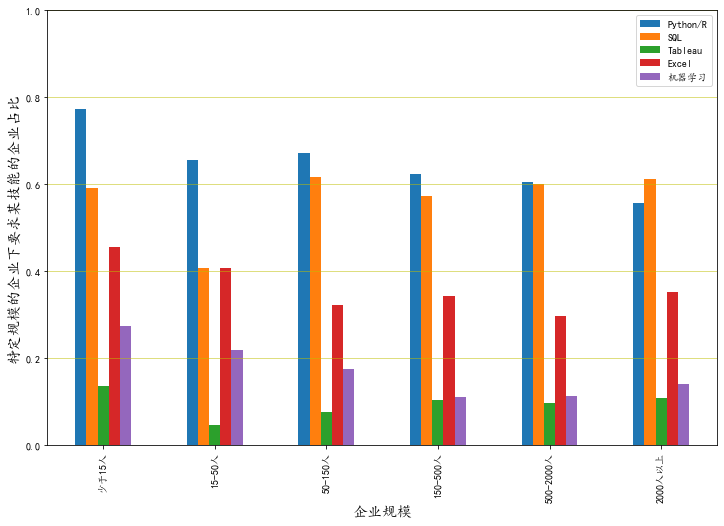

In [28]:
fig,ax = plt.subplots(figsize = (12,8))
df_skills_pro.plot.bar(ax = ax)

ax.set_xlabel('企业规模',fontsize=15)
ax.set_ylabel('特定规模的企业下要求某技能的企业占比',fontsize=15)
ax.set_ylim([0,1])
ax.yaxis.grid(which='both', linewidth=0.5, color='y')

**结论：**

- "Python/R"以及"SQL"是不论企业规模大小都对求职者有要求的技能，Excel其次，要求"Tableau"以及"机器学习"的企业较少
- 少于15人的企业要求机器学习的比例最大，大于2000人的企业要求机器学习最少。（数据是2019年1月的数据，现在反而是大企业会要求机器学习技能比较多，和2019年差别比较大）
- 少于15人与大于2000人的企业中要求Tableau的企业比较多。

### 实习与全职的技能要求

In [31]:
# 重新读入data
df1 = pd.read_csv('boss.csv')
columns = ["positionName", "companyShortName", "city", "companySize", "education", 
           "industryField", "salary",'skillLables', "workYear",  "job_detail"]

# 获取数据分析实习岗位
cond1 = df1['positionName'].str.contains('实习')
cond2 = df1['positionName'].str.contains('数据分析')
df1_intern = df1[cond1 & cond2][columns]
df1_intern['positionName'] = '实习'
df1_intern

,positionName,companyShortName,city,companySize,education,industryField,salary,skillLables,workYear,job_detail
30,实习,陌陌,北京,500-2000人,本科,社交,4k-5k,"['MySQL', '数据分析', 'Linux']",不限,岗位职责：||1、加入关键业务，参与数据采集、数据建设、数据可视化展示的数据全链路工作，为业...
116,实习,北京联行科技,北京,150-500人,硕士,"移动互联网,消费生活",3k-4k,"['数据分析', '数据库', '数据挖掘']",应届毕业生,岗位职责：||1、通过数据分析、数据挖掘等方法，为产品运营及产品优化提供量化的运营支持和有效...
129,实习,好医生集团,北京,150-500人,大专,医疗丨健康,3k-5k,['数据分析'],应届毕业生,参与医疗政策，及标准数据集的搜集和整理工作；||参与医疗数据的获取、清洗与核对工作；||负责...
136,实习,好医生集团,北京,150-500人,大专,医疗丨健康,3k-5k,['数据分析'],应届毕业生,参与医疗政策，及标准数据集的搜集和整理工作；||参与医疗数据的获取、清洗与核对工作；||负责...
166,实习,转转,北京,500-2000人,本科,"移动互联网,消费生活",2k-4k,['数据分析'],应届毕业生,【工作职责】 ||1.对业务进行数据需求支持，开展数据分析工作||2.参与搭建和优化数据分析...
...,...,...,...,...,...,...,...,...,...,...
1796,实习,棱镜七彩,成都,15-50人,本科,信息安全,2k-4k,[],不限,职位描述：|| 本职位为兼职职位||岗位职责：||1）负责安全漏洞审核等工作；||...
1904,实习,孩子王,南京,2000人以上,本科,消费生活,1k-2k,['数据分析'],应届毕业生,工作职责：||1. 通过对成长加APP运营数据分析，优化产品选择；||2. 根据用户日常反馈...
2514,实习,贝业思,西安,15-50人,本科,"数据服务,移动互联网",2k-3k,"['数据挖掘', '数据分析']",应届毕业生,职位描述：||全日制本科高年级学生或硕士以上学历，经济学、数学、统计、物理、计算机专业；||...
2967,实习,玩蜂,苏州,500-2000人,本科,游戏,4k-6k,"['SQL', '数据分析']",应届毕业生,"岗位职责：||1. 帮助游戏业务的各个环节(研发,运营,发行)提供决策需要的数据..."


In [32]:
# 获取数据分析全职岗位
df1_full = df1[~cond1 & cond2][columns]
df1_full['positionName'] = '全职'
df1_full

,positionName,companyShortName,city,companySize,education,industryField,salary,skillLables,workYear,job_detail
0,全职,达达-京东到家,北京,2000人以上,本科,消费生活,15k-30k,"['BI', '数据分析']",3-5年,"1 、负责o2o电商日常运营数据的统计, 监控, 梳理指标体系；||2、基于海量用户行为数据..."
1,全职,音娱时光,北京,50-150人,本科,移动互联网,10k-18k,"['SQL', 'BI', 'SPSS']",1-3年,职责描述：||1. 完善业务数据监控体系，进行新功能指标埋点逻辑设计，搭建分析框架，...
2,全职,千喜鹤,北京,2000人以上,本科,消费生活,20k-30k,"['SQL', '数据分析']",3-5年,工作职责：||1.负责根据业务目标，制定并执行产品或业务的运营数据监控与分析机制。||2.完...
3,全职,吉林省海生电子商务有限公司,北京,少于15人,本科,电商,33k-50k,['数据分析'],3-5年,1.基于对业务的支持和理解，搭建出可以准确反映业务运作状况的数据指标体系；||2.商业嗅觉灵...
4,全职,WPIC,北京,50-150人,本科,"电商,软件开发",10k-15k,['数据分析'],1-3年,职责描述：||1. 调研工作以客户需求为主导；||2. 根据市场调研计划，进行市场信息的收集...
...,...,...,...,...,...,...,...,...,...,...
3040,全职,苏州才客,苏州,15-50人,本科,"移动互联网,电商",20k-30k,"['数据分析', '数据运营']",3-5年,1. 至少三年数据分析经验；||2. 有电商行业/OTA/BAT工作经验的优先考虑；||...
3065,全职,快手,天津,2000人以上,本科,文娱丨内容,8k-10k,"['数据分析', '数据运营', '可视化']",1-3年,岗位职责：||1、负责团队业务、人员指标建立及数据体系搭建，以衡量团队运营能力；|| 2...
3069,全职,林之尚沃,天津,15-50人,本科,医疗丨健康,6k-10k,"['数据分析', '数据运营', 'BI', '数据库']",1-3年,【工作职责】：||1、负责数据报表模板建立，并进行常态数据统计、监控，推动数据平台的建立及完...
3071,全职,格蒂电力,天津,500-2000人,大专,企业服务,6k-12k,"['数据分析', 'Oracle', 'ETL', '数据挖掘']",3-5年,工作职责||1. 负责数据接入、数据整合中的链路配置与调度配置工作。||职位要求||1....


In [33]:
# 两表连接
df2 = pd.concat([df1_intern,df1_full])

In [34]:
# 先数据预处理一下,为表添加表示各个技能的列
df2["Python/R"] = df2['job_detail'].str.contains('python|r').map(lambda x: 1 if x == True else 0)
df2["SQL"] = df2['job_detail'].str.contains('sql').map(lambda x: 1 if x == True else 0)
df2["Tableau"] = df2['job_detail'].str.contains('tableau').map(lambda x: 1 if x == True else 0)
df2["Excel"] = df2['job_detail'].str.contains('excel').map(lambda x: 1 if x == True else 0)
df2["机器学习"] = df2['job_detail'].str.contains('机器学习').map(lambda x: 1 if x == True else 0)
df2_skills = df2.set_index('positionName')[['Python/R','SQL','Tableau','Excel','机器学习']]
df2_skills

,Python/R,SQL,Tableau,Excel,机器学习
positionName,,,,,
实习,0,0,0,0,0
实习,0,0,0,0,0
实习,1,0,0,0,0
实习,1,0,0,0,0
实习,0,0,0,0,0
...,...,...,...,...,...
全职,1,1,0,0,0
全职,0,0,0,0,0
全职,0,0,0,0,0


In [35]:
a = df2_skills.loc['全职',:].sum(axis = 'index').values # 求出全职岗位中要求各个技能的岗位数量
label_a = df2_skills.loc['全职',:].sum(axis = 'index').index # 求出全职岗位中要求各个技能的岗位数量对应的skill index

b = df2_skills.loc['实习',:].sum(axis = 'index').values # 对于实习岗位同理操作
label_b = df2_skills.loc['实习',:].sum(axis = 'index').index

Text(0.5, 1.0, '全职')

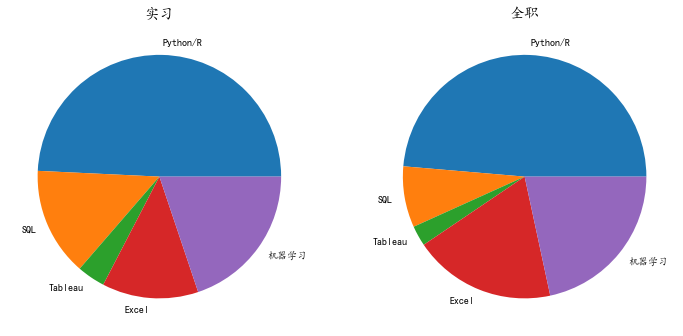

In [36]:
fig,axes = plt.subplots(nrows = 1,ncols = 2,figsize = (12,8))
axes[0].pie(a, labels = label_a)
axes[1].pie(b, labels = label_b)

axes[0].set_title('实习',fontsize = 15)
axes[1].set_title('全职',fontsize = 15)

**结论：**

- 不论全职岗位还是实习岗位对"R,Python"的要求都很高，所以求职者们需要认真学习R、Python。
- Tableau这项技能的要求相对比较低，可见Tableau在数据分析求职者的学习清单中可以排在最后。

In [37]:
# 求出实习和全职岗位对各个技能的要求比例
Python_R = (df2_skills.groupby('positionName')['Python/R'].sum()).div(df2_skills.groupby('positionName')['Python/R'].count())
SQL = (df2_skills.groupby('positionName')['SQL'].sum()).div(df2_skills.groupby('positionName')['SQL'].count())
Tableau = (df2_skills.groupby('positionName')['Tableau'].sum()).div(df2_skills.groupby('positionName')['Tableau'].count())
Excel = (df2_skills.groupby('positionName')['Excel'].sum()).div(df2_skills.groupby('positionName')['Excel'].count())
machl = (df2_skills.groupby('positionName')['机器学习'].sum()).div(df2_skills.groupby('positionName')['机器学习'].count())

df2_skills_pro = pd.concat([Python_R,SQL,Tableau,Excel,machl],axis = 'columns')
df2_skills_pro

,Python/R,SQL,Tableau,Excel,机器学习
positionName,,,,,
全职,0.342197,0.100070,0.025892,0.088873,0.137859
实习,0.209302,0.034884,0.011628,0.081395,0.093023


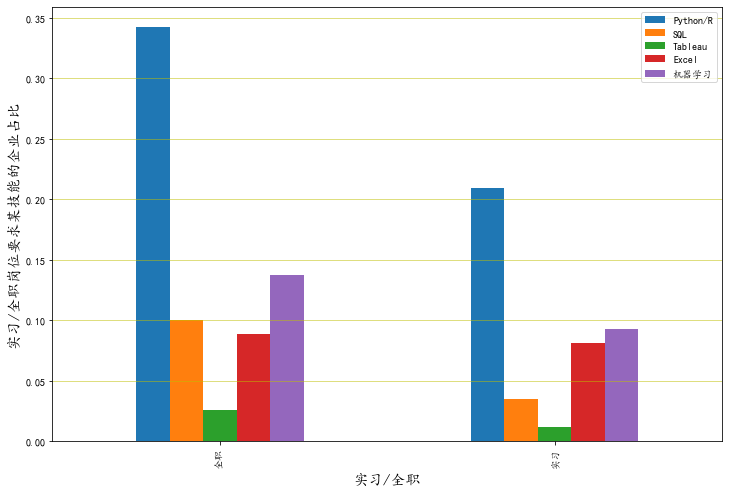

In [38]:
fig,ax = plt.subplots(figsize = (12,8))
df2_skills_pro.plot.bar(ax = ax)

ax.set_xlabel('实习/全职',fontsize=15)
ax.set_ylabel('实习/全职岗位要求某技能的企业占比',fontsize=15)
ax.yaxis.grid(which='both', linewidth=0.5, color='y')

**结论：**

- 实习岗位的各项技能要求都低于全职岗位，这说明实习岗位的门槛比全职岗位的门槛低